Taking `examples/examples.ipynb` as a starting point.  

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

sys.path.append("..")
sys.path.append("../..")

import numpy as np 
import pandas as pd
import yellowbrick as yb

In [3]:
from yellowbrick.features import (ParallelCoordinates,
                                  parallel_coordinates)

### Dataset

In [4]:
from download import download_all 

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
}

def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Return the data frame
    return pd.read_csv(path)

In [5]:
# Load the classification data set
data = load_data('occupancy') 
print(len(data))
data.head()

20560


,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [6]:
# Specify the features of interest and the classes of the target 
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

# Extract the numpy arrays from the data frame 
X = data.head(1000)[features]
y = data.head(1000).occupancy

### Parallel Coordinates
* add dataframe compatibility

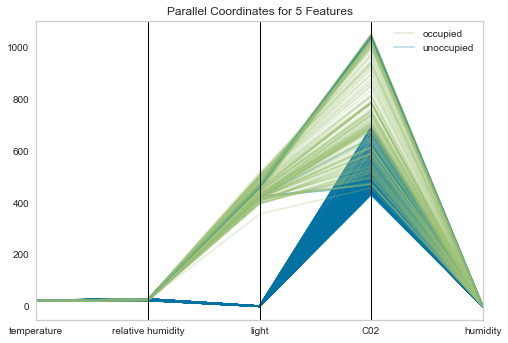

In [7]:
# numpy inputs
visualizer = ParallelCoordinates(features=features, classes=classes)
visualizer.fit_transform_show(X.values, y.values);

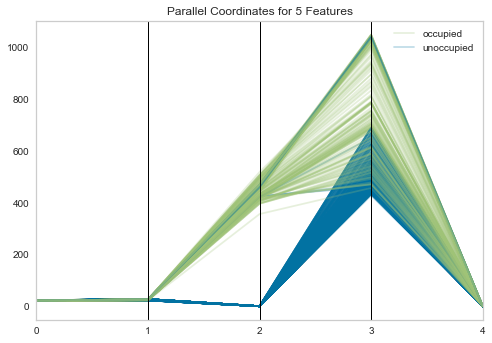

In [8]:
# numpy inputs, no labels
visualizer = ParallelCoordinates(classes=classes)
visualizer.fit_transform_show(X.values, y.values);

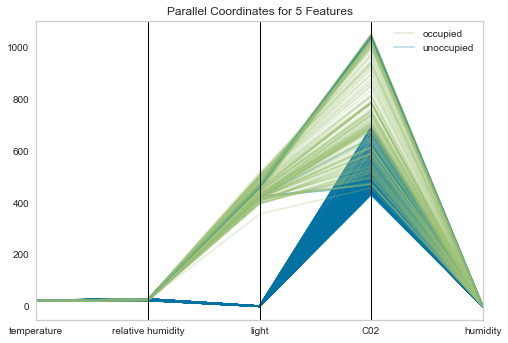

In [9]:
# dataframe inputs
visualizer = ParallelCoordinates(classes=classes)
visualizer.fit_transform_show(X, y);

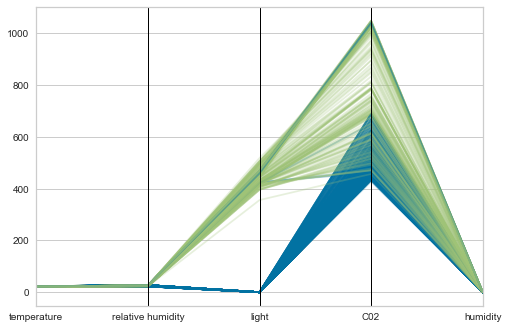

In [10]:
# quick method
parallel_coordinates(X, y);

### `normalize` argument

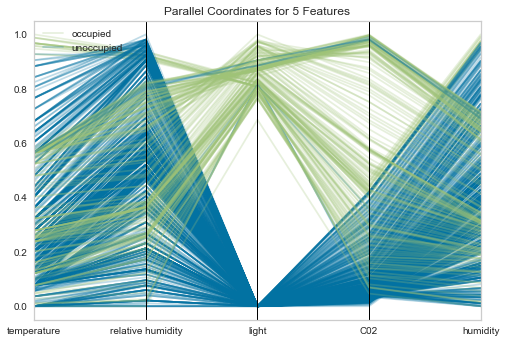

In [11]:
visualizer = ParallelCoordinates(normalize='minmax', classes=classes)
visualizer.fit_transform_show(X, y);

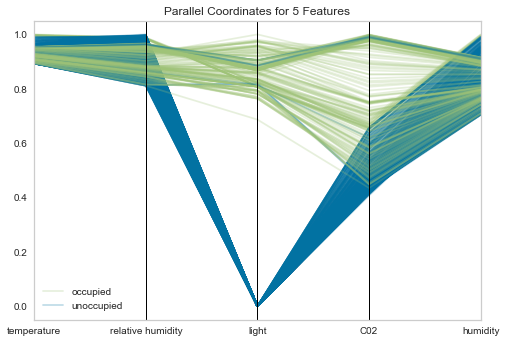

In [12]:
visualizer = ParallelCoordinates(normalize='maxabs', classes=classes)
visualizer.fit_transform_show(X, y);

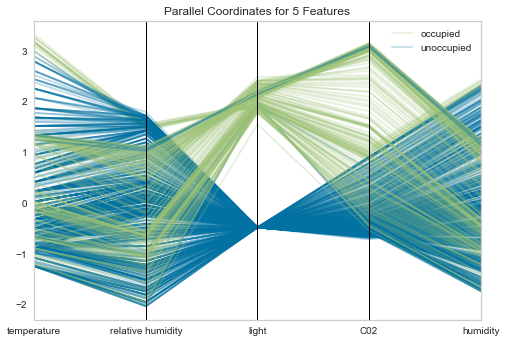

In [13]:
visualizer = ParallelCoordinates(normalize='standard', classes=classes)
visualizer.fit_transform_show(X, y);

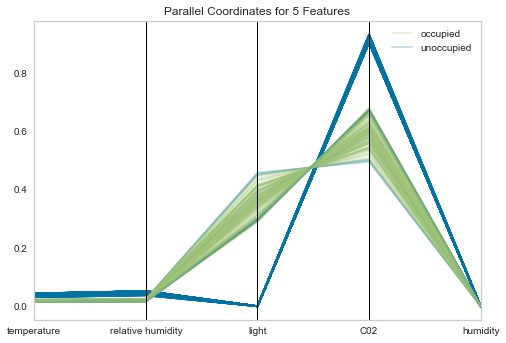

In [14]:
visualizer = ParallelCoordinates(normalize='l1', classes=classes)
visualizer.fit_transform_show(X, y);

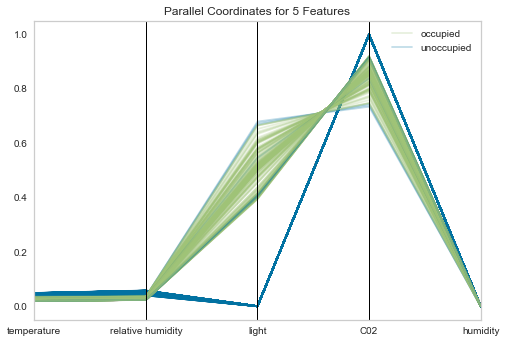

In [15]:
visualizer = ParallelCoordinates(normalize='l2', classes=classes)
visualizer.fit_transform_show(X, y);

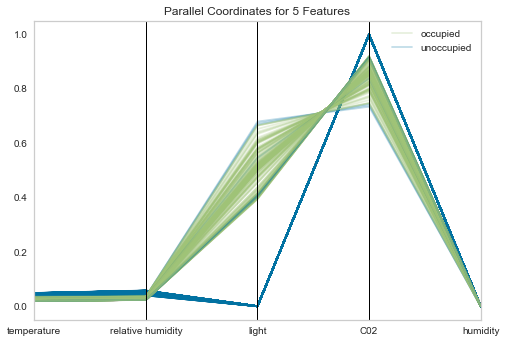

In [16]:
visualizer = ParallelCoordinates(normalize='l2', classes=classes)
visualizer.fit_transform_show(X, y);

In [17]:
# should raise YellowbrickValueError
visualizer = ParallelCoordinates(normalize='bad', classes=classes)
visualizer.fit_transform_show(X, y);

AttributeError: 'ParallelCoordinates' object has no attribute 'normalize'

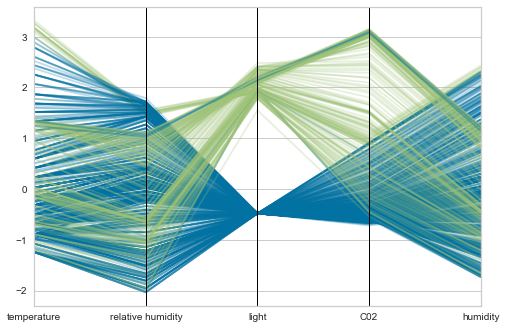

In [18]:
# quick method
parallel_coordinates(X, y, normalize='standard');

### `sample` argument

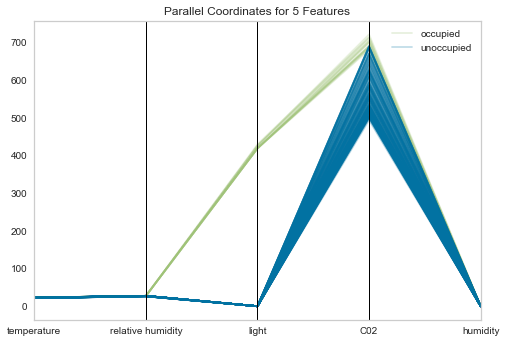

In [19]:
visualizer = ParallelCoordinates(classes=classes, sample=200)
visualizer.fit_transform_show(X, y);

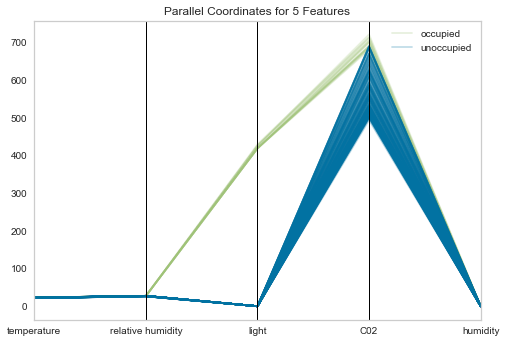

In [20]:
visualizer = ParallelCoordinates(classes=classes, sample=0.2)
visualizer.fit_transform_show(X, y);

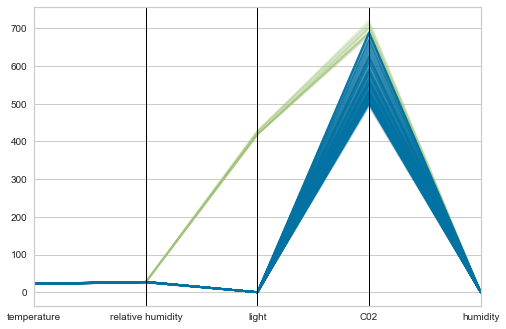

In [21]:
# quick method
parallel_coordinates(X, y, sample=0.2);

In [22]:
# should raise YellowbrickTypeError
visualizer = ParallelCoordinates(classes=classes, sample='bad')
visualizer.fit_transform_show(X, y);

YellowbrickTypeError: `sample` parameter must be int or float

In [23]:
# should raise YellowbrickValueError
visualizer = ParallelCoordinates(classes=classes, sample=-1)
visualizer.fit_transform_show(X, y);

YellowbrickValueError: `sample` parameter of type `int` must be greater than 1

In [24]:
# should raise YellowbrickValueError
visualizer = ParallelCoordinates(classes=classes, sample=1.1)
visualizer.fit_transform_show(X, y);

YellowbrickValueError: `sample` parameter of type `float` must be between 0 and 1